# 1.Introduction
This dataset contains details of various customers having different education status , martial status, family details , income and buying preferences, along with preferred mode of purchase

# 2.Problem Statement
Customer buying behaviour Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

This analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# 3.Installing and Importing Libraries
!pip install -q datascience                                         # A package that is required by pandas-profiling library
!pip install -q pandas-profiling    

In [8]:
!pip install -q --upgrade pandas-profiling

In [9]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
# from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# 4.Data Acquisition & Description


    The dataset consists of 30 features, details are listed below

    ID:                  Customer's unique identifier
    Year_Birth:          Customer's birth year
    Age:                 Age of customer
    Education:           Customer's education level
    Marital_Status:      Customer's marital status
    Income:              Customer's yearly household income
    Kidhome:             Number of children in customer's household
    Teenhome:            Number of teenagers in customer's household
    Dt_Customer:         Date of customer's enrollment with the company
    Recency:             Number of days since customer's last purchase
    Complain:            1 if the customer complained , 0 otherwise
    MntWines:            Amount spent on wine in last 2 years
    MntFruits:           Amount spent on fruits in last 2 years
    MntMeatProducts:     Amount spent on meat in last 2 years
    MntFishProducts:     Amount spent on fish in last 2 years
    MntSweetProducts:    Amount spent on sweets in last 2 years
    MntGoldProds:        Amount spent on gold in last 2 years
    NumDealsPurchases:   Number of purchases made with a discount
    AcceptedCmp1:        1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2:        1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3:        1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4:        1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5:        1 if customer accepted the offer in the 5th campaign, 0 otherwise
    NumWebPurchases:     Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases:   Number of purchases made directly in stores
    NumWebVisitsMonth:   Number of visits to company’s website in the last month
    Response, Z_CostContact,Z_Revenue: These columns are not having much clarity



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Datasets/marketing_campaign.xlsx")
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (2240, 30)


,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,65,Graduation,Single,58138.00000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,68,Graduation,Single,46344.00000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,57,Graduation,Together,71613.00000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,38,Graduation,Together,26646.00000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,41,PhD,Married,58293.00000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### 4.1 Data Description

In [12]:
data.describe()

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00000,2240.00000,2240.00000,2216.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000,2240.00000
mean,5592.15982,1968.80580,53.19420,52247.25135,0.44420,0.50625,49.10938,303.93571,26.30223,166.95000,37.52545,27.06295,44.02188,2.32500,4.08482,2.66205,5.79018,5.31652,0.07277,0.07455,0.07277,0.06429,0.01339,0.00937,3.00000,11.00000,0.14911
std,3246.66220,11.98407,11.98407,25173.07666,0.53840,0.54454,28.96245,336.59739,39.77343,225.71537,54.62898,41.28050,52.16744,1.93224,2.77871,2.92310,3.25096,2.42665,0.25981,0.26273,0.25981,0.24532,0.11498,0.09639,0.00000,0.00000,0.35627
min,0.00000,1893.00000,26.00000,1730.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000,11.00000,0.00000
25%,2828.25000,1959.00000,45.00000,35303.00000,0.00000,0.00000,24.00000,23.75000,1.00000,16.00000,3.00000,1.00000,9.00000,1.00000,2.00000,0.00000,3.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000,11.00000,0.00000
50%,5458.50000,1970.00000,52.00000,51381.50000,0.00000,0.00000,49.00000,173.50000,8.00000,67.00000,12.00000,8.00000,24.00000,2.00000,4.00000,2.00000,5.00000,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000,11.00000,0.00000
75%,8427.75000,1977.00000,63.00000,68522.00000,1.00000,1.00000,74.00000,504.25000,33.00000,232.00000,50.00000,33.00000,56.00000,3.00000,6.00000,4.00000,8.00000,7.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000,11.00000,0.00000
max,11191.00000,1996.00000,129.00000,666666.00000,2.00000,2.00000,99.00000,1493.00000,199.00000,1725.00000,259.00000,263.00000,362.00000,15.00000,27.00000,28.00000,13.00000,20.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,3.00000,11.00000,1.00000


**Observations:**
   
   - We can see the description of many continuous features.

   - Max Age and max Income looks little unrealastic.
   
   - Purchase made by person having max income are also very too much than rest of the records
    
   - Lets see next, how many records are present with max income  which is 666666
    
   - We can see that there is only one such record, This person could be extremely rich, however even if we remove this
      record,it would hardly impact the analysis
    

In [13]:
data[data["Income"]==666666.00000]

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,45,Graduation,Together,666666.00000,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


**Observations:**
   
 - We can see that there is only one such record, Either this person could be extremely rich or we have data entry 
   issue, however even if we remove this record,it would hardly impact the analysis
    

### **4.2 Data Information**
- In this section we will see the **information about the types of features**.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Age                  2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

**Observations:**

- There are **30 features** with **2240 observations**.

- **Education**  and **Martual Status** are the only categorical variables.


# 5.Data Pre-Processing


### **5.1 Handling of Missing Data**
- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [15]:
data.isnull().sum()


ID                      0
Year_Birth              0
Age                     0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### **Observations:**

- There are **24 records** where no income is indicated, lets see the values of other features in these records


In [16]:
data[data.isnull().any(axis=1)]

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,39,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,36,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,63,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,71,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,40,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,49,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,65,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,65,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,49,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,61,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


#### **Observations:**

- There are quite a lot of purchase even if income is not indicated, and as Income is diversified, replacing it with central       tendency may not indicate true picture hence we will be deleting such records



In [17]:
data.drop(data[data["Income"].isnull()==True].index, inplace=True)
data.isnull().sum()

ID                     0
Year_Birth             0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### **5.2 Handling of Redundant Data**

- In this section, we will identify redundant data and check the proportion of it and take appropriate measures.

In [18]:
print('Contains Duplicate Rows?', data.duplicated().any())

Contains Duplicate Rows? False


#### **Observations:**

- No duplicated record found



### **5.3 Handling of Inconsistent Data**

- In this section, we will **identify inconsistency** in data and and then **take appropriate measures**



In [19]:
# Check "Marital_Status" unique values
data["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

**Action**

- Replace **Together** to **Married** category
- Replace **Alone** , **Yolo**, **Absurd**, **Divorced**,**Widow** to **Single** category



In [20]:
data["Marital_Status"]=data["Marital_Status"].replace(["Alone","YOLO","Absurd","Divorced","Widow"], "Single")
data["Marital_Status"]=data["Marital_Status"].replace("Together", "Married")
data["Marital_Status"].value_counts()

Married    1430
Single      786
Name: Marital_Status, dtype: int64

In [21]:
data["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

**Action**

- Replace **2nd Cycle** to **Master** category


In [22]:
data["Education"]=data["Education"].replace(["2n Cycle"], "Master")
data["Education"].value_counts()

Graduation    1116
Master         565
PhD            481
Basic           54
Name: Education, dtype: int64

In [23]:
data["Z_CostContact"].value_counts()


3    2216
Name: Z_CostContact, dtype: int64

In [24]:
data["Z_Revenue"].value_counts()

11    2216
Name: Z_Revenue, dtype: int64

**Observation**

- There is no clarity on these features and values in these features are a single value which would not be contributing much 
  hence will delete these columns

In [25]:
#Check if Dt_Customer > Todays Date
#print(pd.to_datetime(data["Dt_Customer"].dtype))
data[data["Dt_Customer"]>np.datetime64(datetime.date.today())].value_counts()

Series([], dtype: int64)

**Observation**
- Dt_Customer column has correct values

### **5.4 Handling of Outliers**

- **Age** feature was showing us some **unrealastic numbers** , lets see how many are >100


In [26]:
data["Age"][data["Age"]>100].value_counts()

122    1
129    1
123    1
Name: Age, dtype: int64

**Observations**
- There are only 3 records, possibility that 1 is prefixed as typo hence deleting it

In [27]:
# import datetime
# year=datetime.date.today().strftime("%Y")
# data["Age"]=int(year)-data["Year_Birth"]

data['Age'][data['Age'] > 100] = data['Age']-100
data["Age"][data["Age"]>100].value_counts()

Series([], Name: Age, dtype: int64)

### **5.5 Create Additional Features (Aggregated Column)**


In [28]:
data["TotalKids"]=data["Kidhome"]+data["Teenhome"]
data.insert(8,"HaveKids","")
for index,value in data["TotalKids"].items():
    if(int(value)>0):
         data["HaveKids"][index]="Y"
    else:
        data["HaveKids"][index]="N"

data["TotalCompaignAccepted"]=data["AcceptedCmp1"]+data["AcceptedCmp2"]+data["AcceptedCmp3"]+ \
data["AcceptedCmp4"]+data["AcceptedCmp5"]
data["MntTotalPurchase"]=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+ \
data['MntSweetProducts']+data['MntGoldProds']
data["NumYearEnrollment"] = ((np.datetime64(datetime.date.today())-data["Dt_Customer"])/365/np.timedelta64(1,"D"))

# 6.Exploratory Data Analysis


In [29]:
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,HaveKids,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalKids,TotalCompaignAccepted,MntTotalPurchase,NumYearEnrollment
0,5524,1957,65,Graduation,Single,58138.00000,0,0,N,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,0,1617,9.76438
1,2174,1954,68,Graduation,Single,46344.00000,1,1,Y,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,0,27,8.25753
2,4141,1965,57,Graduation,Married,71613.00000,0,0,N,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,0,776,8.80274
3,6182,1984,38,Graduation,Married,26646.00000,1,0,Y,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,0,53,8.32877
4,5324,1981,41,PhD,Married,58293.00000,1,0,Y,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,0,422,8.38904


### Q1:What is the frequency of transaction and total no of products purchased by Education Category?

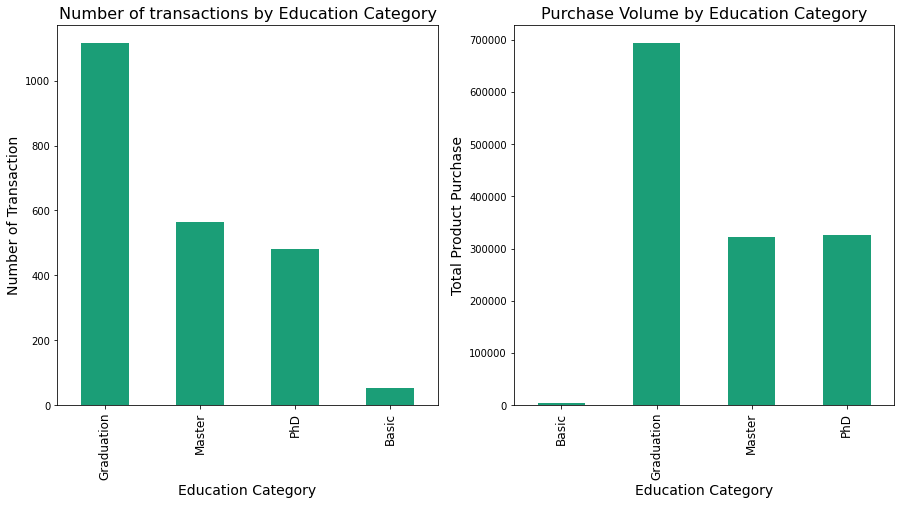

In [30]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

plt.subplot(1,2,1)

# Using magic of pandas's bar function
data['Education'].value_counts().plot.bar(color='#1B9E77')

# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(rotation=90, size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Education Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Number of Transaction', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Number of transactions by Education Category', size=16)


plt.subplot(1,2,2)

data.groupby("Education")["MntTotalPurchase"].sum().plot.bar(color='#1B9E77')
# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(rotation=90, size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Education Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Total Product Purchase', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Purchase Volume by Education Category', size=16)

# Display the output by rendering visual on the screen
plt.show()

**Observation**
- Graduates are doing maximum no of transaction as well as buying maximum no of products
- Masters are in 2nd maximum no of transaction however buying slightly less no of products than PHD

### Q2: What is the frequency of transaction and total no of products purchased by Marital_Status?

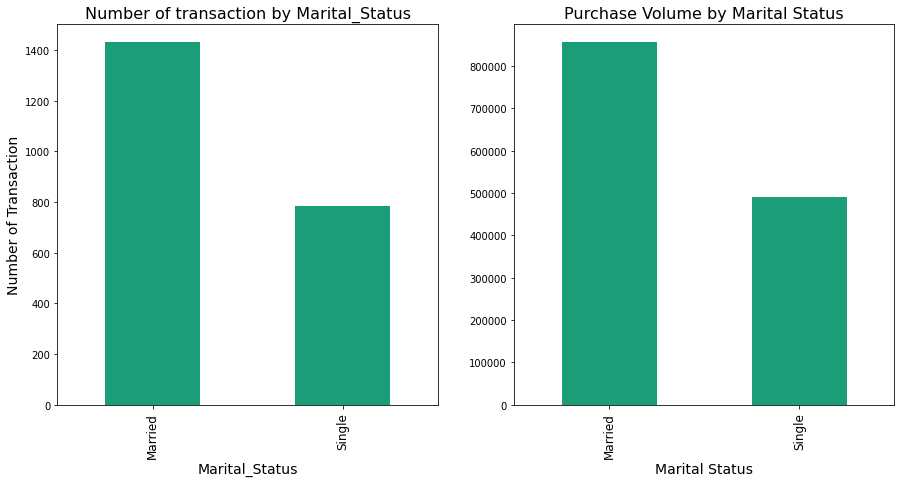

In [31]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

plt.subplot(1,2,1)

# Using magic of pandas's bar function
data['Marital_Status'].value_counts().plot.bar(color='#1B9E77')

# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(rotation=90, size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Marital_Status', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Number of Transaction', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Number of transaction by Marital_Status', size=16)

plt.subplot(1,2,2)

data.groupby("Marital_Status")["MntTotalPurchase"].sum().plot.bar(color='#1B9E77')
# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(rotation=90, size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Marital Status', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Purchase Volume by Marital Status', size=16)

# Display the output by rendering visual on the screen
plt.show()

**bold text**### Q3:Education Vs Marital Status Vs Age  and Total Purchase

[Text(0, 0.5, 'Basic-Married'),
 Text(0, 1.5, 'Basic-Single'),
 Text(0, 2.5, 'Graduation-Married'),
 Text(0, 3.5, 'Graduation-Single'),
 Text(0, 4.5, 'Master-Married'),
 Text(0, 5.5, 'Master-Single'),
 Text(0, 6.5, 'PhD-Married'),
 Text(0, 7.5, 'PhD-Single')]

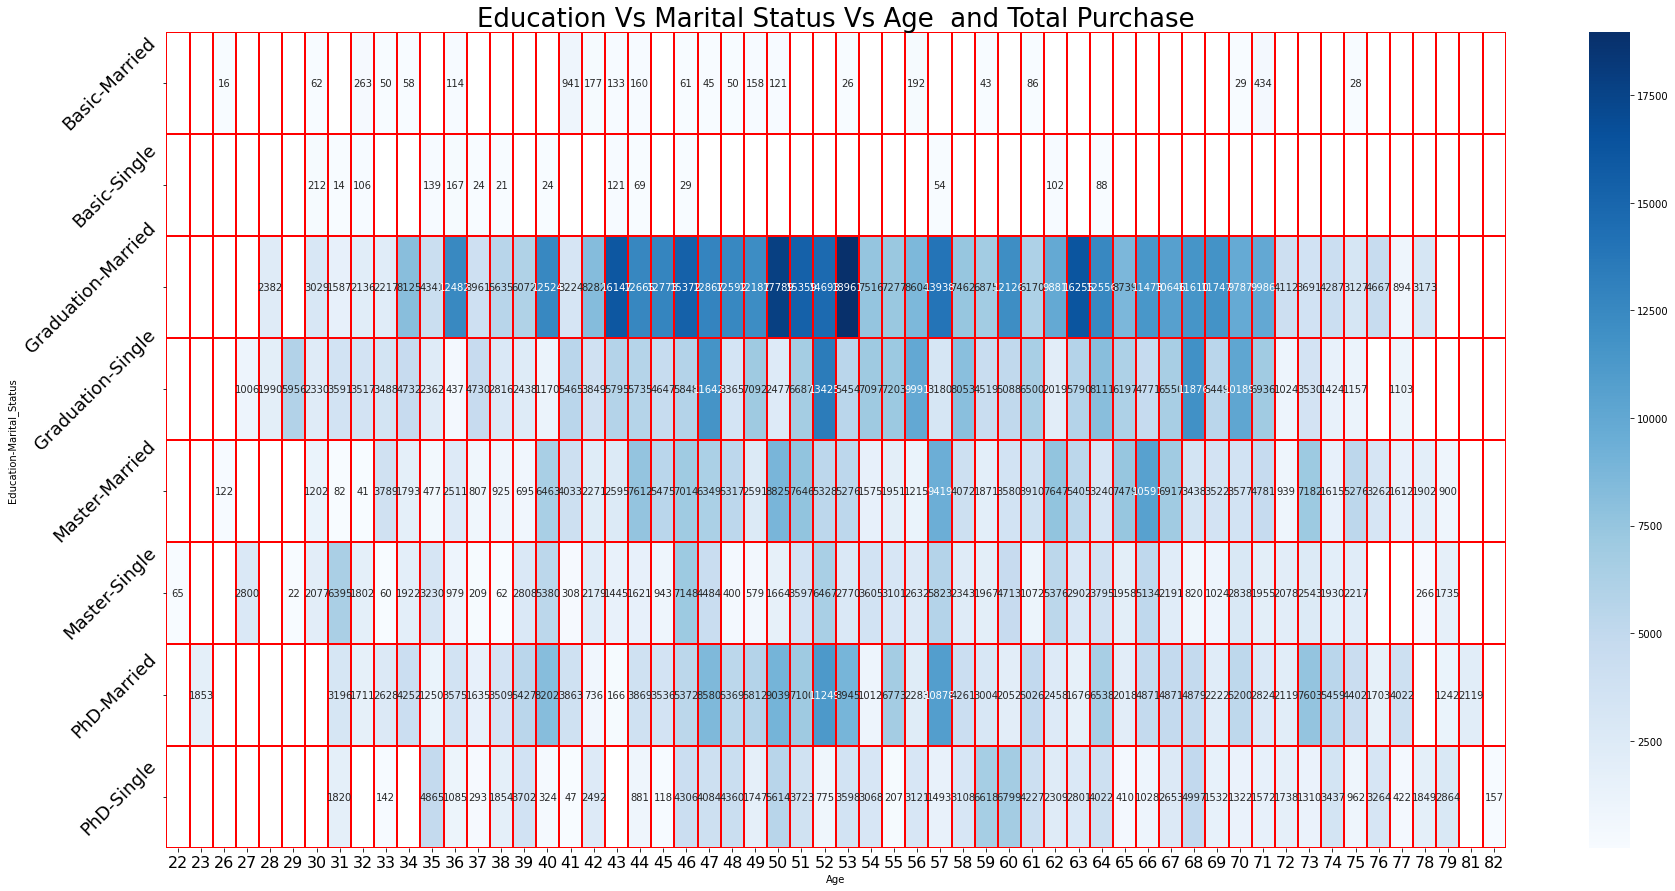

In [32]:
figure = plt.figure(figsize=[30, 15])
data1=data.groupby(["Education","Marital_Status","Age"])["MntTotalPurchase"].sum().unstack()
p1=sns.heatmap(data=data1, annot=True, cmap='Blues', fmt='g',linewidth=1, linecolor='Red')
p1.set_title("Education Vs Marital Status Vs Age  and Total Purchase", size=26)
#p1.set_xticklabels(fontsize = 18)
p1.set_xticklabels(p1.get_xmajorticklabels(), fontsize = 16)
p1.set_yticklabels(p1.get_ymajorticklabels(), fontsize = 18, rotation=45)


**Observation**
- Married people are doing maximum no of transaction as well as buying maximum no of products (more purchase volume)

### Q3:What is the frequency of transaction and Total Product Purchase by Having Kids (Y/N)?

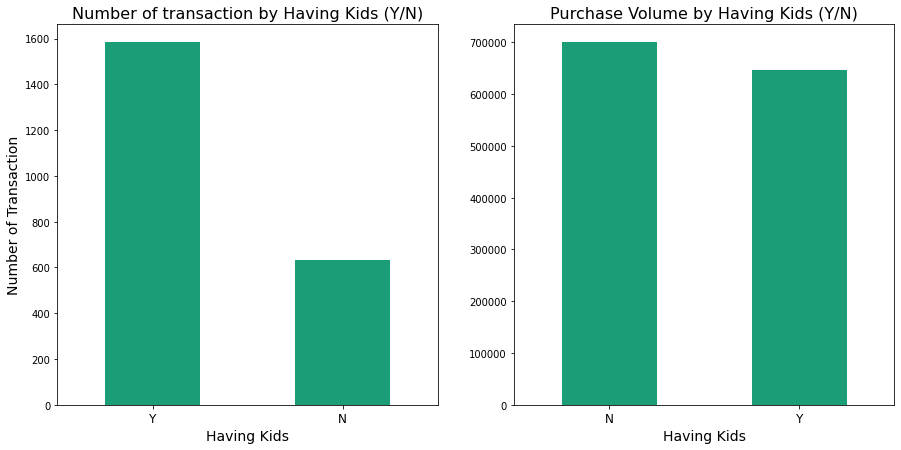

In [33]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

plt.subplot(1,2,1)

# Using magic of pandas's bar function
data['HaveKids'].value_counts().plot.bar(color='#1B9E77')

# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(rotation=0, size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Having Kids', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Number of Transaction', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Number of transaction by Having Kids (Y/N)', size=16)

plt.subplot(1,2,2)

data.groupby("HaveKids")["MntTotalPurchase"].sum().plot.bar(color='#1B9E77')
# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(rotation=0, size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Having Kids', size=14)

# Labelling title with a custom label and size of 16
plt.title(label='Purchase Volume by Having Kids (Y/N)', size=16)

# Display the output by rendering visual on the screen
plt.show()

**Observation**
        -People having kids do more number of transaction however buy less volume of products, perhaps they dont want to stock            and buy fresh items
        
### Q4: What is the frequency of transaction by Income?

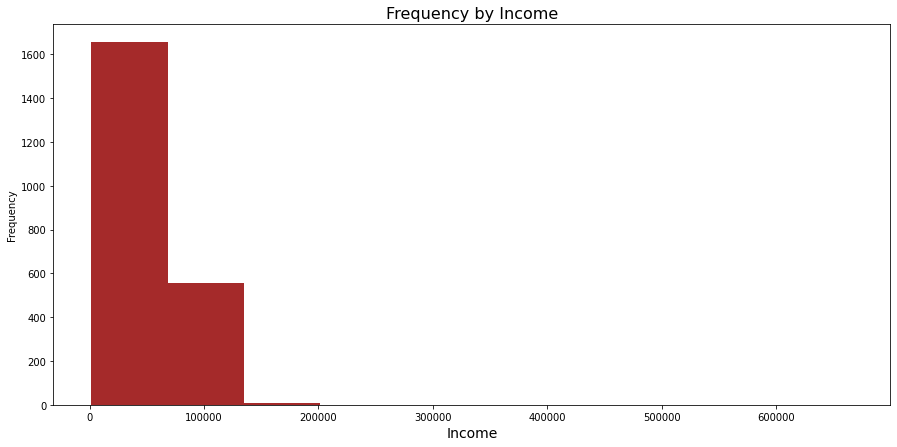

In [34]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas area() function

data['Income'].plot.hist(color='brown')

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Income', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Frequency by Income', size=16)


# Display the output by rendering visual on the screen
plt.show()

### Q5: What is the frequency of transaction by Age and purchase from deals?

Text(0.5, 1.0, 'Age Distribution Vs Deal Purchase')

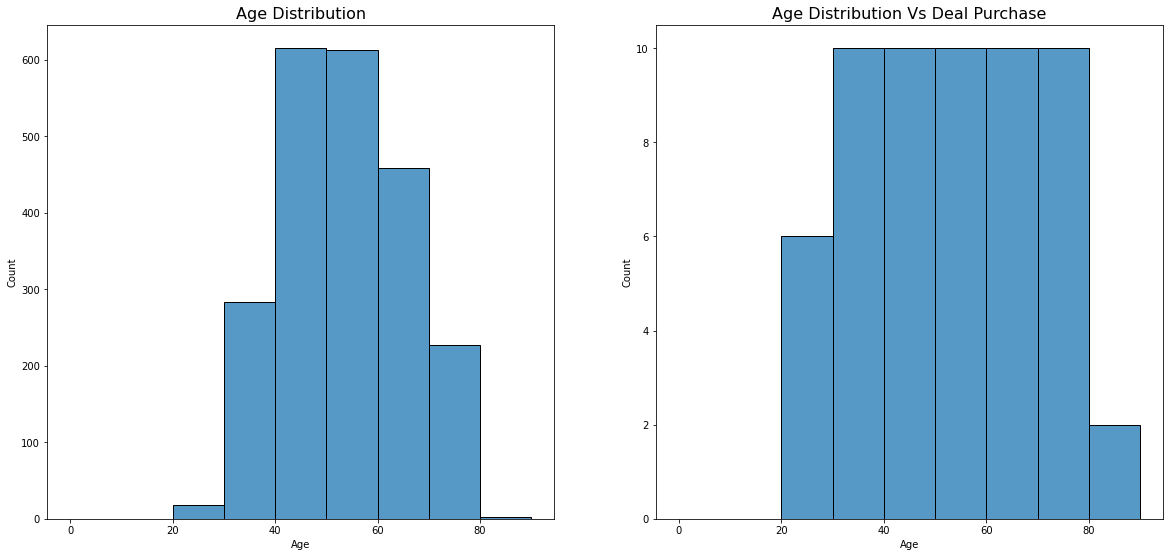

In [35]:
# fig = plt.figure(figsize=[15, 7])

fig = plt.figure(figsize = (20,20)) # width x height
ax1 = fig.add_subplot(2, 2, 1) # row, column, position
ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(3, 3, 3)
# ax4 = fig.add_subplot(3, 3, 4)
# ax5 = fig.add_subplot(3, 3, 5)
# ax6 = fig.add_subplot(3, 3, 6)

#bins = [0,20, 30, 40, 50, 60, 70, 80, 90,100]
bins=np.arange(0,100,10)
p1=sns.histplot(data=data, x="Age", ax=ax1,linewidth=1, bins=bins)
p1.set_title("Age Distribution", size=16)
bins=np.arange(0,100,10)
data1=data.groupby("Age")["NumDealsPurchases"].sum()
p2=sns.histplot(data=data1, x="Age", ax=ax2,linewidth=1, bins=bins)
p2.set_title("Age Distribution Vs Deal Purchase", size=16)
#p2.set_xticklabels(p1.get_xmajorticklabels(), fontsize = 16)
#p2.set_yticklabels("Deals",fontsize = 18, rotation=45)
#ax2.set_yticks(np.arange(0,11,1))
#plt.yticks(np.arange(0,300,50))



**Observation**
        -People in early Age and Late Age are doing less transaction while people in Age range 40-60 do maximum transaction
        -People in early Age and Late Age are accepting less deals while people in Age range 30-80 are taking maximum deal,hence          deals marketing can be target to these specific segment customer


### Q6: What is the frequency distribution of Compaign Acceptance

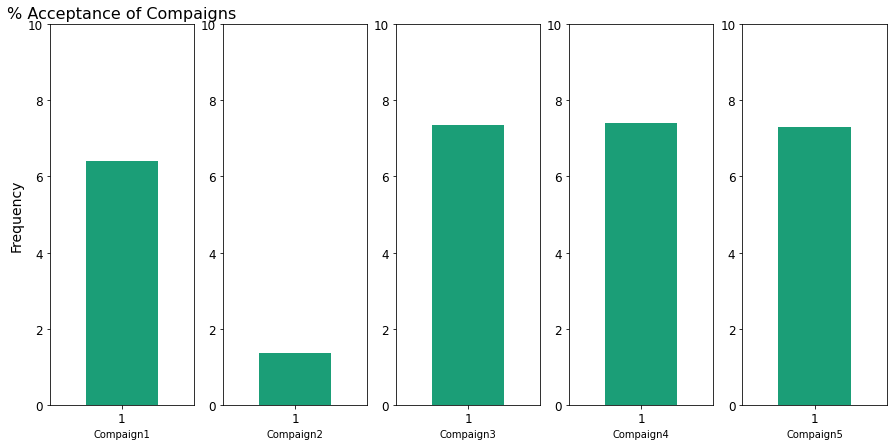

In [36]:
# Creating a custom figure size of 15 X 7 inches
import matplotlib.ticker as mtick

figure = plt.figure(figsize=[15, 7])

plt.subplot(1,5,1)
# Using magic of pandas's bar function
((data["AcceptedCmp1"][data['AcceptedCmp1']==1]).value_counts()/len(data['AcceptedCmp1'])*100).plot.bar\
(color='#1B9E77',xlabel="Compaign1")
plt.xticks(rotation=0, size=12)
plt.ylabel(ylabel='Frequency', size=14)
plt.yticks(ticks=np.arange(0, 11, 2), size=12)
plt.title(label='% Acceptance of Compaigns', size=16)


plt.subplot(1,5,2)
# Using magic of pandas's bar function
((data["AcceptedCmp2"][data['AcceptedCmp2']==1]).value_counts()/len(data['AcceptedCmp2'])*100).plot.bar\
(color='#1B9E77',xlabel="Compaign2")
plt.xticks(rotation=0, size=12)
plt.yticks(ticks=np.arange(0, 11, 2), size=12)

plt.subplot(1,5,3)
# Using magic of pandas's bar function
((data["AcceptedCmp3"][data['AcceptedCmp3']==1]).value_counts()/len(data['AcceptedCmp3'])*100).plot.bar\
(color='#1B9E77',xlabel="Compaign3")

plt.xticks(rotation=0, size=12)
plt.yticks(ticks=np.arange(0, 11, 2), size=12)

plt.subplot(1,5,4)
# Using magic of pandas's bar function
((data["AcceptedCmp4"][data['AcceptedCmp4']==1]).value_counts()/len(data['AcceptedCmp4'])*100).plot.bar\
(color='#1B9E77',xlabel="Compaign4")

plt.xticks(rotation=0, size=12)
plt.yticks(ticks=np.arange(0, 11, 2), size=12)

plt.subplot(1,5,5)
# Using magic of pandas's bar function
((data["AcceptedCmp5"][data['AcceptedCmp5']==1]).value_counts()/len(data['AcceptedCmp5'])*100).plot.bar\
(color='#1B9E77',xlabel="Compaign5")
plt.xticks(rotation=0, size=12)
plt.yticks(ticks=np.arange(0, 11, 2), size=12)

#Display the output by rendering visual on the screen
plt.show()

**Observation**
        -Acceptance is low , we may need to make compaign more attractive
  
### Q7: Are there more complains?

Text(0.5, 1.0, 'Complain Ratio')

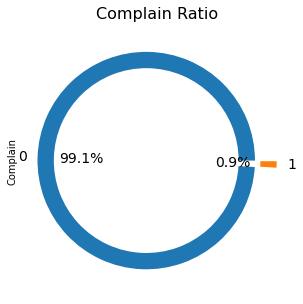

In [37]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[5, 5])

# Exploding space based on the number of categories
space = np.ones(2)/10

# Using magic of pandas pie() function

data["Complain"].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15) )
plt.title(label='Complain Ratio', size=16)

**Observations**
-Not much complain so looks like happy customers

### Q8: Which product is sold more?

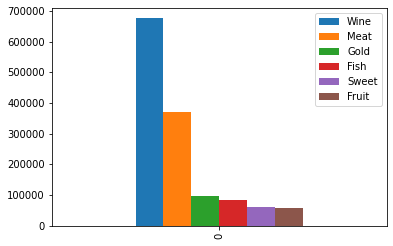

In [45]:
details = {"Wine": [data['MntWines'].sum()],"Meat": [data['MntMeatProducts'].sum()],"Gold": [data["MntGoldProds"].sum()],"Fish": [data['MntFishProducts'].sum()],"Sweet": [data['MntSweetProducts'].sum()],"Fruit":[data['MntFruits'].sum()]}
dataProdCount=pd.DataFrame(details)
dataProdCount
dataProdCount.plot.bar()

**Observation**
    -Wines are most preferred product, followed by meat, gold , fish, sweet and fruit


### Q9: What are the Product Preference by (Education)

Text(0.5, 1.0, 'Gold Purchase')

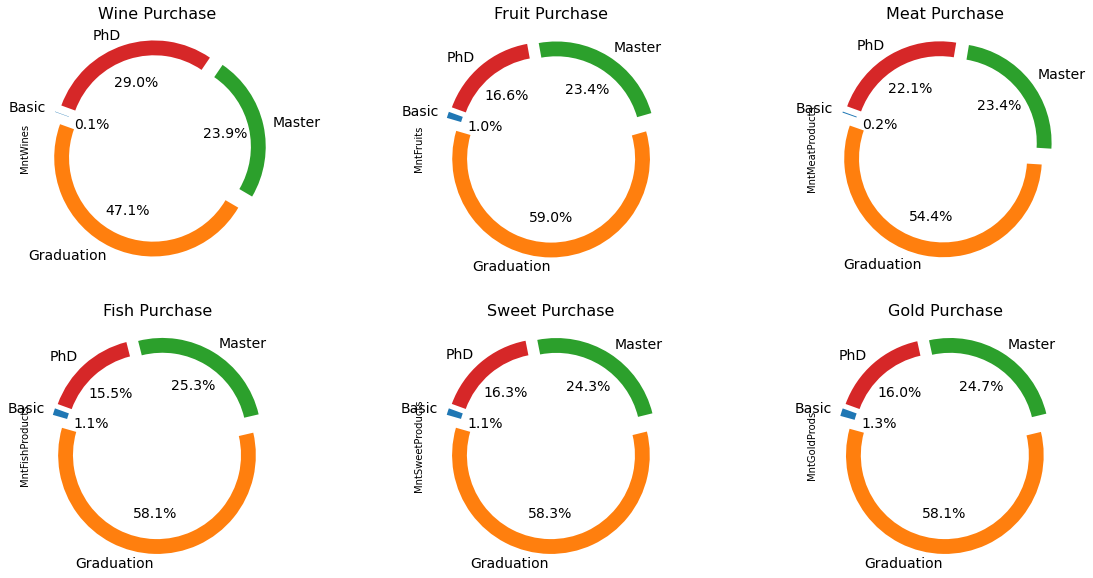

In [39]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[20, 10])

# Exploding space based on the number of categories
space = np.ones(4)/10

# Using magic of pandas pie() function
plt.subplot(2,3,1)
data.groupby("Education")["MntWines"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Wine Purchase', size=16)

plt.subplot(2,3,2)
data.groupby("Education")["MntFruits"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Fruit Purchase', size=16)

plt.subplot(2,3,3)
data.groupby("Education")["MntMeatProducts"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Meat Purchase', size=16)

plt.subplot(2,3,4)
data.groupby("Education")["MntFishProducts"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Fish Purchase', size=16)

plt.subplot(2,3,5)
data.groupby("Education")["MntSweetProducts"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Sweet Purchase', size=16)

plt.subplot(2,3,6)
data.groupby("Education")["MntGoldProds"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Gold Purchase', size=16)



**Observation**
-Graduates by more volume of all 6 products, followed by masters and then PHDs

### Q8: What are the Product Preference by (Marital Status)

Text(0.5, 1.0, 'Gold Purchase')

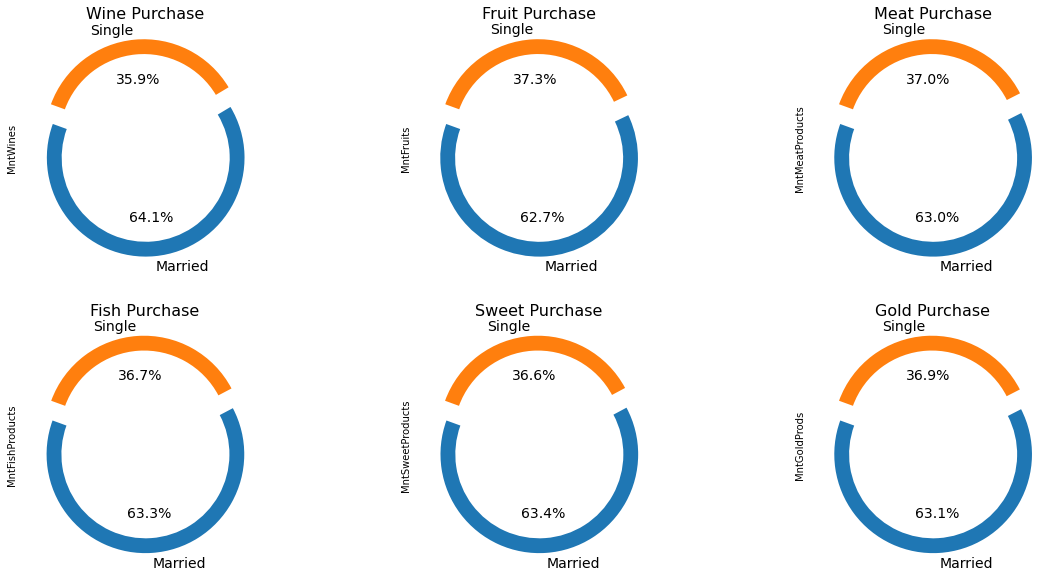

In [40]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[20, 10])

# Exploding space based on the number of categories
space = np.ones(2)/10

# Using magic of pandas pie() function
plt.subplot(2,3,1)
data.groupby("Marital_Status")["MntWines"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Wine Purchase', size=16)

plt.subplot(2,3,2)
data.groupby("Marital_Status")["MntFruits"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Fruit Purchase', size=16)

plt.subplot(2,3,3)
data.groupby("Marital_Status")["MntMeatProducts"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Meat Purchase', size=16)

plt.subplot(2,3,4)
data.groupby("Marital_Status")["MntFishProducts"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Fish Purchase', size=16)

plt.subplot(2,3,5)
data.groupby("Marital_Status")["MntSweetProducts"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Sweet Purchase', size=16)

plt.subplot(2,3,6)
data.groupby("Marital_Status")["MntGoldProds"].sum().plot(kind='pie', explode=space, fontsize=14, 
                                        autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       startangle=160, )
plt.title(label='Gold Purchase', size=16)

**Observation**
-Married by more volume of all 6 products than Singles

### Q9 what is the relation between Education Vs Maritial Status Vs Product Preference

Text(0.5, 1.0, 'Gold Analysis')

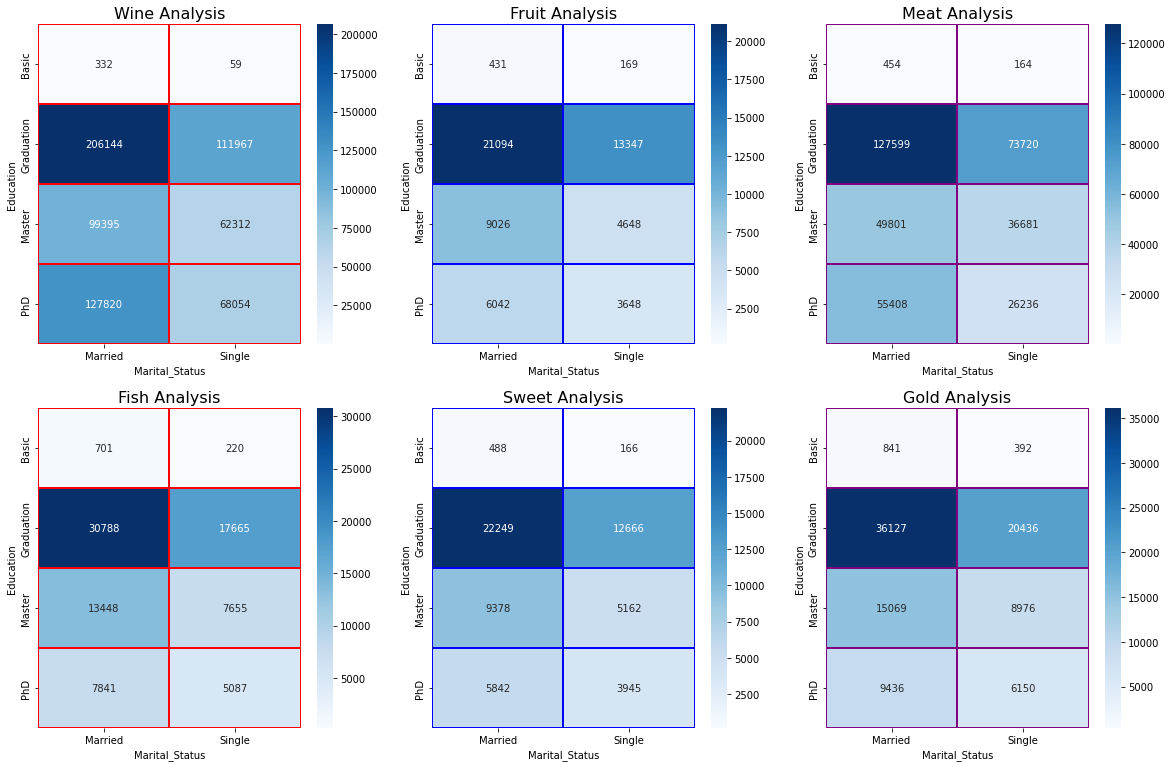

In [41]:
# Creating a custom figure size of 15 X 7 inches
#figure = plt.figure(figsize=[15, 7])

#f,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,3)
fig = plt.figure(figsize = (20,20)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)


data1=data.groupby(["Education","Marital_Status"])["MntWines"].sum().unstack()
p1=sns.heatmap(data=data1, annot=True, cmap='Blues', fmt='g', ax=ax1,linewidth=1, linecolor='Red')
p1.set_title("Wine Analysis", size=16)

data2=data.groupby(["Education","Marital_Status"])["MntFruits"].sum().unstack()
p2=sns.heatmap(data=data2, annot=True, cmap='Blues', fmt='g', ax=ax2,linewidth=1, linecolor='Blue')
p2.set_title("Fruit Analysis", size=16)

data3=data.groupby(["Education","Marital_Status"])["MntMeatProducts"].sum().unstack()
p3=sns.heatmap(data=data3, annot=True, cmap='Blues', fmt='g', ax=ax3,linewidth=1, linecolor='Purple')
p3.set_title("Meat Analysis", size=16)

data4=data.groupby(["Education","Marital_Status"])["MntFishProducts"].sum().unstack()
p4=sns.heatmap(data=data4, annot=True, cmap='Blues', fmt='g', ax=ax4,linewidth=1, linecolor='Red')
p4.set_title("Fish Analysis", size=16)

data5=data.groupby(["Education","Marital_Status"])["MntSweetProducts"].sum().unstack()
p5=sns.heatmap(data=data5, annot=True, cmap='Blues', fmt='g', ax=ax5,linewidth=1, linecolor='Blue')
p5.set_title("Sweet Analysis", size=16)

data6=data.groupby(["Education","Marital_Status"])["MntGoldProds"].sum().unstack()
p6=sns.heatmap(data=data6, annot=True, cmap='Blues', fmt='g', ax=ax6,linewidth=1, linecolor='Purple')
p6.set_title("Gold Analysis", size=16)



**Observations**
- All 6 product purchase are more by married graduates, followed by single graduates
- other than graduates fruits,sweets,gold are bought more by married masters
- Meat by married PHDs
- Lets drill down further and see people from what segment of segment of Age prefer wine

**Observations**
- We can see that married graduate those at at age slab 50 purchase more wine 
- Similar drill down can be done on other products too

### Q10 : What is preferred purchase mode by marital status and education

<Figure size 1800x504 with 0 Axes>

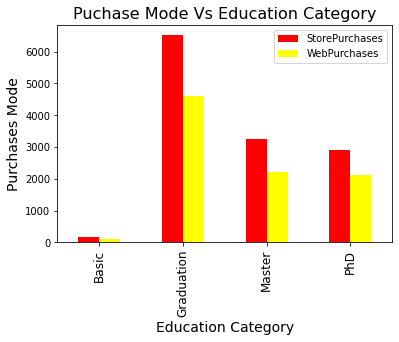

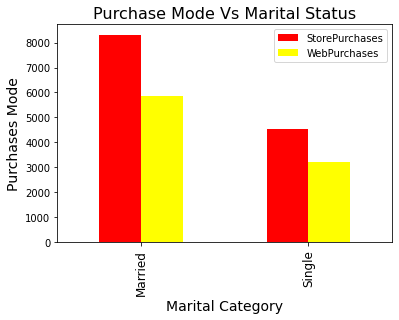

In [42]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[25, 7])

#plt.subplot(1,2,1)

# Using magic of pandas bar() function for plotting stack bar plot
data.groupby('Education')['NumStorePurchases','NumWebPurchases'].sum() \
.plot.bar(color=['red', 'yellow','grey'])

# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(size=12, rotation=90)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Education Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Purchases Mode', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Puchase Mode Vs Education Category', size=16)

# Setting up legend
plt.legend(labels=("StorePurchases", 'WebPurchases', 'CatalogPurchases'))
#plt.show()

#plt.subplot(1,2,2)

data.groupby('Marital_Status')['NumStorePurchases','NumWebPurchases'].sum() \
.plot.bar(color=['red', 'yellow','grey'])

# Changing x-ticks label size to 12 and rotating to 90 degrees
plt.xticks(size=12, rotation=90)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Marital Category', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Purchases Mode', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Purchase Mode Vs Marital Status', size=16)

# Setting up legend for the fat types
plt.legend(labels=("StorePurchases", 'WebPurchases', 'CatalogPurchases'))


#Display the output by rendering visual on the screen
#plt.show()

bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]

data1=data.groupby(["Education","Marital_Status"])["MntWines"].sum().unstack()
p1=sns.heatmap(data=data1, annot=True, cmap='Blues', fmt='g', ax=ax1,linewidth=1, linecolor='Red')
p1.set_title("Wine Analysis", size=16)
# Setting up legend for the fat types
plt.legend(labels=("StorePurchases", 'WebPurchases'))


#Display the output by rendering visual on the screen
plt.show()


**Observations**
    - People between 20-30, 40-50 and above 60 buys more online
    - People between 50-60 prefer going to store
    - People between 30-40 are open for both store purchase and online purchase
    
### Q11: Is there any corelation between products purchase pattern

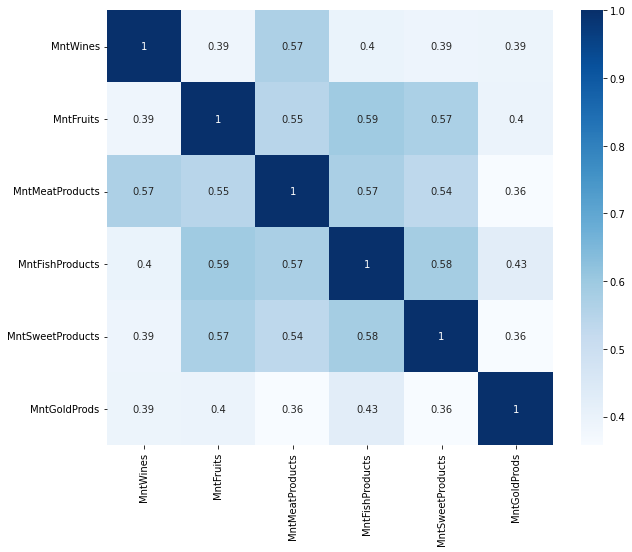

In [43]:
dataCorr=data[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]]
plt.figure(figsize=(10,8))
sns.heatmap(dataCorr.corr(), annot=True,cmap='Blues')
plt.show()

**Observations**
    - Meat and wine are bought together more frequently
    - fruits, sweets and fish are  bought together more frequently


### **Wine Analysis**

[Text(0, 0.5, 'Basic-Married'),
 Text(0, 1.5, 'Basic-Single'),
 Text(0, 2.5, 'Graduation-Married'),
 Text(0, 3.5, 'Graduation-Single'),
 Text(0, 4.5, 'Master-Married'),
 Text(0, 5.5, 'Master-Single'),
 Text(0, 6.5, 'PhD-Married'),
 Text(0, 7.5, 'PhD-Single')]

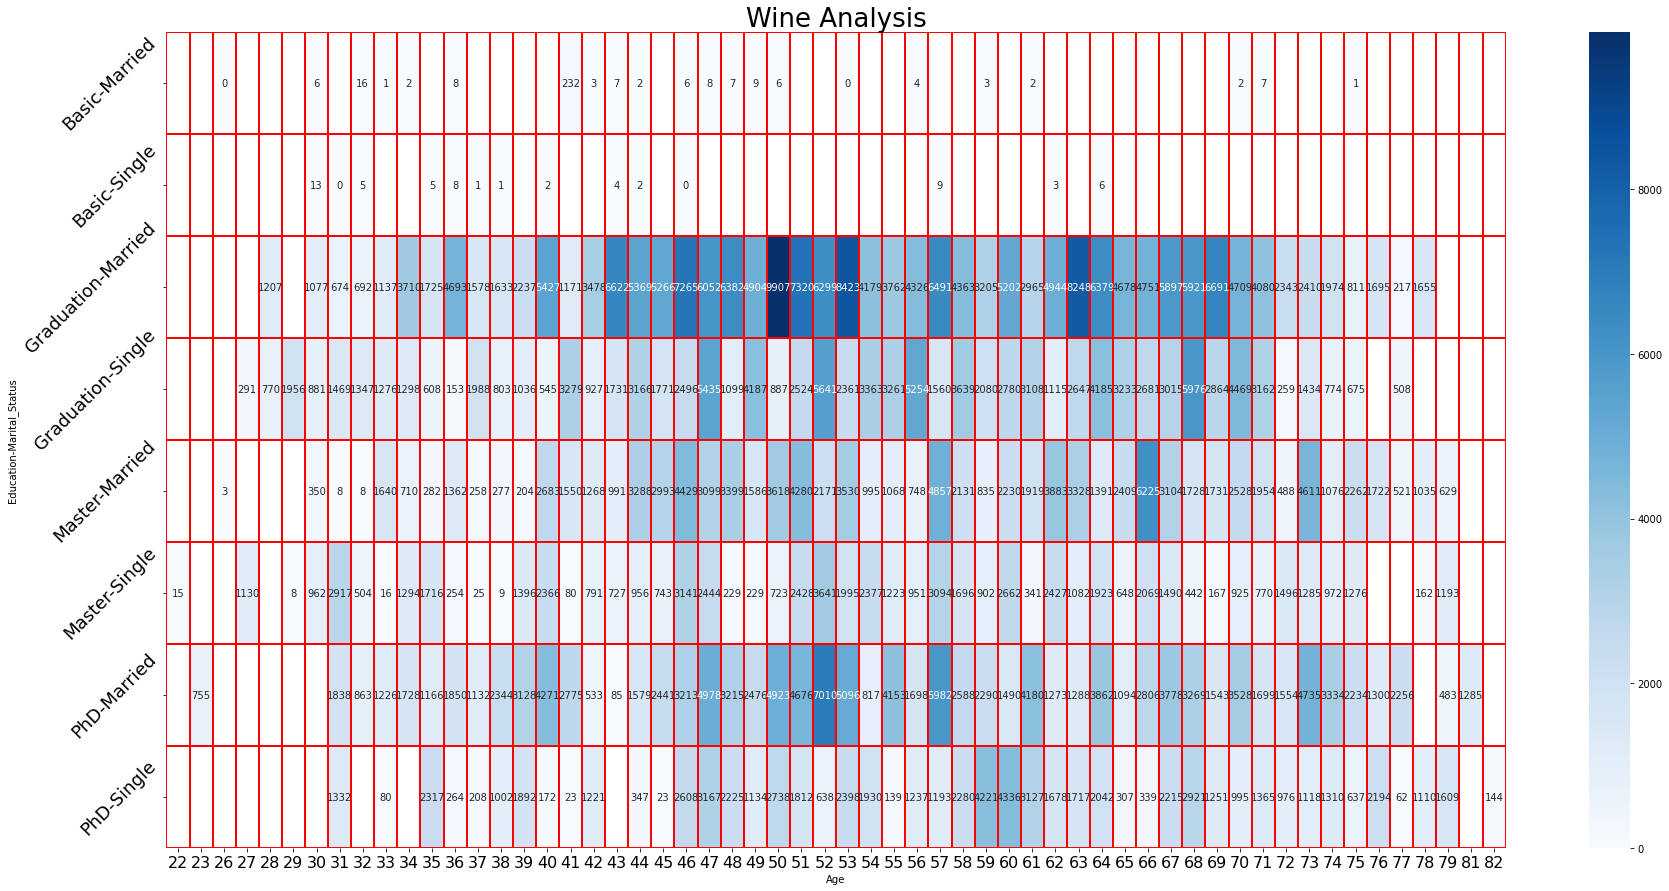

In [44]:
figure = plt.figure(figsize=[30, 15])
data1=data.groupby(["Education","Marital_Status","Age"])["MntWines"].sum().unstack()
p1=sns.heatmap(data=data1, annot=True, cmap='Blues', fmt='g',linewidth=1, linecolor='Red')
p1.set_title("Wine Analysis", size=26)
p1.set_xticklabels(p1.get_xmajorticklabels(), fontsize = 16)
p1.set_yticklabels(p1.get_ymajorticklabels(), fontsize = 18, rotation=45)



**1st level Analysis**

Graduates buy more wine than others 

Married buys more wine than single

**2nd level analysis**

Married graduates buys more wine

**3rd Level Analysis**

married graduate those at age slab 50 purchase more wine


# 7.Actionable Insight



*   More focus to be given on campaign marketing as currently acceptance % is <10
*   Target More deals for people in age range 40-60
*   Recommend Meat when Wine is bought and vice-versa 
*   Recommend  Fruits and Sweets when Fish is bought 



